# Importing the dataset

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
dataset = yf.Ticker('^GSPC')
dataset = dataset.history(period="max")
dataset = dataset.loc['1980-01-01':]
dataset

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-01-02 00:00:00-05:00,0.000000,108.430000,105.290001,105.760002,40610000,0.0,0.0
1980-01-03 00:00:00-05:00,0.000000,106.080002,103.260002,105.220001,50480000,0.0,0.0
1980-01-04 00:00:00-05:00,0.000000,107.080002,105.089996,106.519997,39130000,0.0,0.0
1980-01-07 00:00:00-05:00,0.000000,107.800003,105.800003,106.809998,44500000,0.0,0.0
1980-01-08 00:00:00-05:00,0.000000,109.290001,106.290001,108.949997,53390000,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000,0.0,0.0
2023-09-14 00:00:00-04:00,4487.779785,4511.990234,4478.689941,4505.100098,3648720000,0.0,0.0
2023-09-15 00:00:00-04:00,4497.979980,4497.979980,4447.209961,4450.319824,6932230000,0.0,0.0


# Data preprocessing part

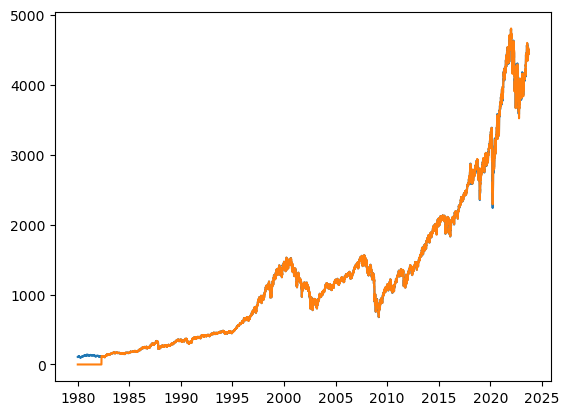

In [3]:
x = dataset.index
y1 = dataset['Close']
y2 = dataset['Open']
plt.plot(x,y1)
plt.plot(x,y2)

In [4]:
drop_clm = ['Dividends', 'Stock Splits']
dataset = dataset.drop(columns=drop_clm, axis=1)
dataset

,Open,High,Low,Close,Volume
Date,,,,,
1980-01-02 00:00:00-05:00,0.000000,108.430000,105.290001,105.760002,40610000
1980-01-03 00:00:00-05:00,0.000000,106.080002,103.260002,105.220001,50480000
1980-01-04 00:00:00-05:00,0.000000,107.080002,105.089996,106.519997,39130000
1980-01-07 00:00:00-05:00,0.000000,107.800003,105.800003,106.809998,44500000
1980-01-08 00:00:00-05:00,0.000000,109.290001,106.290001,108.949997,53390000
...,...,...,...,...,...
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000
2023-09-14 00:00:00-04:00,4487.779785,4511.990234,4478.689941,4505.100098,3648720000
2023-09-15 00:00:00-04:00,4497.979980,4497.979980,4447.209961,4450.319824,6932230000


In [5]:
row_num , clm_num = dataset.shape

In [6]:
dataset['Tomorrow_close'] = 0
dataset['Target'] = 0

for i in range(0,row_num-1):
    dataset['Tomorrow_close'][i] = dataset['Close'][i+1]
    
for i in range(0,row_num):
    if dataset['Tomorrow_close'][i] > dataset['Close'][i]:
        dataset['Target'][i] = int(1)
    else:
        dataset['Target'][i] = int(0)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6792\1918500865.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Tomorrow_close'][i] = dataset['Close'][i+1]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6792\1918500865.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Target'][i] = int(0)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6792\1918500865.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Target'

In [7]:
dataset

,Open,High,Low,Close,Volume,Tomorrow_close,Target
Date,,,,,,,
1980-01-02 00:00:00-05:00,0.000000,108.430000,105.290001,105.760002,40610000,105.220001,0
1980-01-03 00:00:00-05:00,0.000000,106.080002,103.260002,105.220001,50480000,106.519997,1
1980-01-04 00:00:00-05:00,0.000000,107.080002,105.089996,106.519997,39130000,106.809998,1
1980-01-07 00:00:00-05:00,0.000000,107.800003,105.800003,106.809998,44500000,108.949997,1
1980-01-08 00:00:00-05:00,0.000000,109.290001,106.290001,108.949997,53390000,109.050003,1
...,...,...,...,...,...,...,...
2023-09-13 00:00:00-04:00,4462.649902,4479.390137,4453.520020,4467.439941,3529430000,4505.100098,1
2023-09-14 00:00:00-04:00,4487.779785,4511.990234,4478.689941,4505.100098,3648720000,4450.319824,0
2023-09-15 00:00:00-04:00,4497.979980,4497.979980,4447.209961,4450.319824,6932230000,4453.529785,1


# Data spliting

In [8]:
train_data = dataset.iloc[:-250]
test_data = dataset.iloc[-250:]

# Data scaling

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_feature_scale = scaler.fit_transform(train_data[['Open','High','Low','Close','Volume']])
test_feature_scale = scaler.transform(test_data[['Open','High','Low','Close','Volume']])

# Model training

Training and accuracy checking with Random Forest Classifer

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
feature = ['Open','High','Low','Close','Volume']
lebel = 'Target'
model.fit(train_data[feature], train_data[lebel])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [11]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

test_pred = model.predict(test_data[feature])
test_lebel = test_data['Target'].values         #convert to numpy array

f1 = f1_score(test_lebel, test_pred)
accuracy = accuracy_score(test_lebel, test_pred)
print('Model : Random Forest')
print('F1_score -',f1)
print('Accuracy_score -',accuracy)

Model : Random Forest
F1_score - 0.5745454545454546
Accuracy_score - 0.532


Training and accuracy checking with SVM Classifer

In [12]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', C=15)
model_svm.fit(train_feature_scale, train_data[lebel])

SVC(C=15)

In [13]:
test_pred = model_svm.predict(test_feature_scale)

f1_svm = f1_score(test_lebel, test_pred)
accuracy_svm = accuracy_score(test_lebel, test_pred)
print('Model : Support Vector Machine')
print('F1 score -',f1_svm)
print('Accuracy score -',accuracy_svm)

Model : Support Vector Machine
F1 score - 0.6521739130434783
Accuracy score - 0.488


Training and accuracy checking with Logistic Regression 

In [14]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(train_data[feature], train_data[lebel])

LogisticRegression()

In [15]:
test_pred = model_logistic.predict(test_data[feature])

f1_logistic = f1_score(test_lebel, test_pred)
accuracy_logistic = accuracy_score(test_lebel, test_pred)
print('Model : Logistic Regression ')
print('F1 score -',f1_logistic)
print('Accuracy score -',accuracy_logistic)

Model : Logistic Regression 
F1 score - 0.6522911051212937
Accuracy score - 0.484


# Back Testing part

In [16]:
#back_testing
all_predictions = []
past_days = 2500             #10 years of previous data
next_days = 250              #next year after that 10 yaers

for i in range(past_days, row_num, next_days):
    train = dataset.iloc[0:i].copy()
    test = dataset.iloc[i:(i+next_days)].copy()
    model.fit(train[feature], train[lebel])
    prediction = model.predict(test[feature])
    prediction = pd.Series(prediction, index=test.index, name="Predictions")
    prediction_df = pd.concat([test["Target"], prediction], axis=1)
    all_predictions.append(prediction_df)

all_predictions_df = pd.concat(all_predictions)

In [17]:
all_predictions_df

,Target,Predictions
Date,,
1989-11-20 00:00:00-05:00,1,1
1989-11-21 00:00:00-05:00,1,1
1989-11-22 00:00:00-05:00,1,1
1989-11-24 00:00:00-05:00,1,1
1989-11-27 00:00:00-05:00,1,0
...,...,...
2023-09-13 00:00:00-04:00,1,1
2023-09-14 00:00:00-04:00,0,1
2023-09-15 00:00:00-04:00,1,0


In [18]:
f1_bt = f1_score(all_predictions_df['Target'],all_predictions_df['Predictions'])
print('Back Testing F1 score -',f1_bt)

Back Testing F1 score - 0.4344666493641319
